In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
from datetime import timedelta, datetime
from function_interpolate_1theodolite import process_lidar_1theodolite
from function_interpolate_2theodolites import process_lidar_2theodolite
import seaborn as sns
import os

In [2]:
ds_lidar_cut, theo_interp = process_lidar_1theodolite(
    lidar_file="Data_Lidar/20250827_090000.nc",
    theo_file="Data_Theodolite/TheoRot_20250827_150544.txt",
    date_str="2025-08-27",
    start_time_str="09:08:09",
    azimuth_offset= 107.46
)

Metadata: S 25/08/27 09:08:09


In [3]:
# cut out the valid periods for day 2025-08-27
valid1 = datetime(2025, 8, 27, 9, 21, 0)  # 2025-08-27 11:21:00
valid2 = datetime(2025, 8, 27, 9, 39, 0)  # 2025-08-27 11:39:00
valid3 = datetime(2025, 8, 27, 9, 45, 0)  # 2025-08-27 11:45:00
valid4 = datetime(2025, 8, 27, 9, 53, 0)  # 2025-08-27 11:53:00

VEL_27_09_1 = ds_lidar_cut.sel(time=slice(valid1, valid2))
VEL_27_09_2 = ds_lidar_cut.sel(time=slice(valid3, valid4))
theo_27_09_1 = theo_interp.sel(time=slice(valid1, valid2))
theo_27_09_2 = theo_interp.sel(time=slice(valid3, valid4))

In [4]:
ds_lidar_cut_0829, theo_interp_0829 = process_lidar_2theodolite(
    lidar_file="Data_Lidar/20250829/combined_20250829.nc",
    theoRot_file="Data_Theodolite/TheoRot_20250829_123352.txt",
    theoGelb_file="Data_Theodolite/TheoGelb_20250829_124013.txt",
    date_str="2025-08-29",
    start_time_str="08:31:08",
    azimuth_offsetRot= 129.1787,
    azimuth_offsetGelb= 51.8498
)

Metadata: S 25/08/29 08:31:09
Metadata: S 25/08/29 08:31:08


In [5]:
files = ["20250901_090000.nc", "20250901_100000.nc", "20250901_110000.nc", "20250901_120000.nc", "20250901_130000.nc", "20250901_140000.nc"]

folder = "Data_Lidar/20250901"
file_paths = [os.path.join(folder, f) for f in files]

# Öffnen und automatisch entlang der Dimension "time" kombinieren
ds = xr.open_mfdataset(file_paths, combine='by_coords')

# Ergebnis als neues NetCDF speichern
ds.to_netcdf("Data_Lidar/20250901/combined_20250901.nc")

In [8]:
ds_lidar = xr.open_dataset("Data_Lidar/20250901/combined_20250901.nc")
ds_lidar

<xarray.Dataset> Size: 1MB
Dimensions:              (time: 756, height: 14)
Coordinates:
  * height               (height) float32 56B 7.0 10.0 15.0 ... 180.0 200.0
  * time                 (time) datetime64[ns] 6kB 2025-09-01T09:00:32.990731...
Data variables: (12/22)
    time_coverage_start  (time) |S128 97kB ...
    time_coverage_end    (time) |S128 97kB ...
    instrument_type      (time) |S128 97kB ...
    platform_type        (time) |S128 97kB ...
    time_reference       (time) |S128 97kB ...
    lat                  (time) float32 3kB ...
    ...                   ...
    MSE                  (time, height) float64 85kB ...
    VALID                (time, height) float64 85kB ...
    MDT                  (time, height) float64 85kB ...
    SNR                  (time, height) float64 85kB ...
    SPW                  (time, height) float64 85kB ...
    QUALITY              (time, height) uint8 11kB ...
Attributes:
    Conventions:       CF-1.7
    title:             METEK LiDAR Profile Data
    institution:       University of Innsbruck, ACINN
    references:        
    source:            
    history:           
    comment:           Hochhaeuser
    instrument_name:   WindRanger16
    firmware_version:  0.9.34
    site_name:         Hochhaeuser
    field_names:       VEL,DIR,U,V,W,MSE,VALID,MDT,SNR,SPW,QUALITY

In [6]:
ds_lidar_cut_0901_period1, theo_interp_0901_period1 = process_lidar_2theodolite(
    lidar_file="Data_Lidar/20250901/combined_20250901.nc",
    theoRot_file="Data_Theodolite/TheoRot_20250901_1st_period.txt",
    theoGelb_file="Data_Theodolite/TheoGelb_20250901_1st_period.txt",
    date_str="2025-09-01",
    start_time_str="09:03:20",
    azimuth_offsetRot= 0.0,
    azimuth_offsetGelb= 0.0
)
ds_lidar_cut_0901_period2, theo_interp_0901_period2 = process_lidar_2theodolite(
    lidar_file="Data_Lidar/20250901/combined_20250901.nc",
    theoRot_file="Data_Theodolite/TheoRot_20250901_2nd_period.txt",
    theoGelb_file="Data_Theodolite/TheoGelb_20250901_2nd_period.txt",
    date_str="2025-09-01",
    start_time_str="12:17:09",
    azimuth_offsetRot= 0.0,
    azimuth_offsetGelb= 0.0
)

Metadata: S 25/09/01 09:03:20
Metadata: S 25/09/01 09:03:20
Metadata: S 25/09/01 12:17:09
Metadata: S 25/09/01 12:17:08


ValueError: index must be monotonic increasing or decreasing

In [28]:
### ---- Define parameters here -------
height_value = 60 # m
bin_size = 5 # deg
### create dataframes of each measurement period
df1 = pd.DataFrame({
    'elevation': theo_27_09_1['elevation'].values,
    'wind_speed': VEL_27_09_1['VEL'].sel(height=height_value).values
})
df2 = pd.DataFrame({
    'elevation': theo_27_09_2['elevation'].values,
    'wind_speed': VEL_27_09_2['VEL'].sel(height=height_value).values
})

df3 = pd.DataFrame({
    'elevation': theo_interp_0829['elevation'].values,
    'wind_speed': ds_lidar_cut_0829['VEL'].sel(height=height_value).values
})
### just add more dataframes for more days/measurement periods

# Combine all
df_all = pd.concat([df1, df2, df3], ignore_index=True)


In [30]:
bins = np.arange(0, 91, bin_size)
labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)] ### pretty labels

# Elevation in bins
df_all['elev_bin'] = pd.cut(df_all['elevation'], bins=bins, labels=labels, include_lowest=True)

/var/folders/k6/y7fg0_p51yj9myt7l79bb1mc0000gn/T/ipykernel_70551/1880959716.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_all.groupby('elev_bin').size()


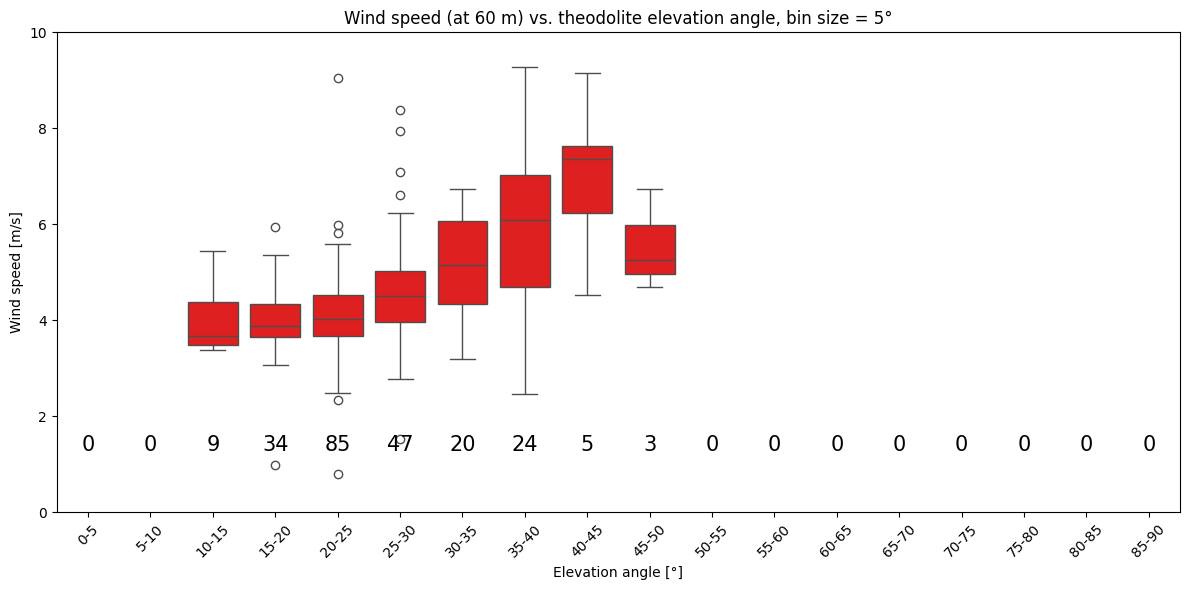

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='elev_bin', y='wind_speed', data=df_all, color='r')

plt.xlabel('Elevation angle [°]')
plt.ylabel('Wind speed [m/s]')
plt.title(f'Wind speed (at {height_value} m) vs. theodolite elevation angle, bin size = {bin_size}°')
plt.xticks(rotation=45)
plt.ylim(0, 10)

# Show data points per bin
counts = df_all.groupby('elev_bin').size()
ax = plt.gca()
for i, bin_label in enumerate(labels):
    ax.text(i, 1.2, str(counts.get(bin_label,0)), ha='center', va='bottom', fontsize=15)

plt.tight_layout()
plt.show()


(0.0, 10.0)

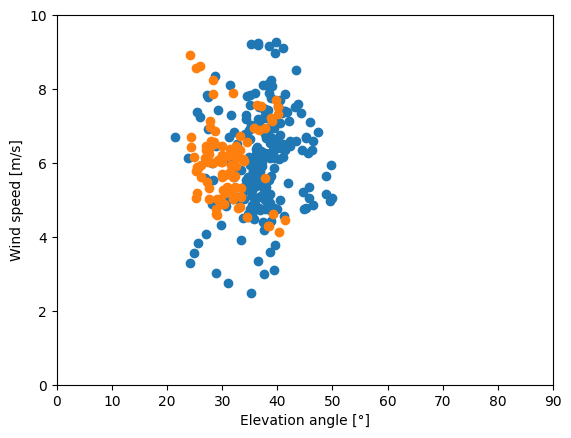

In [80]:
fig = plt.figure()
plt.scatter(theo_27_09_1['elevation'], VEL_27_09_1.sel(height=60))
plt.scatter(theo_27_09_2['elevation'], VEL_27_09_2.sel(height=60))
plt.xlabel('Elevation angle [°]')
plt.ylabel('Wind speed [m/s]')
plt.xlim(0,90)
plt.ylim(0,10)